<a href="https://colab.research.google.com/github/viisantos/pesquisa/blob/main/dados_SMA5_kernel_poly_Brasil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install plotly==5.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import datetime
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats.mstats as mStats
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.filters.hp_filter import hpfilter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
#from sklearn.metrics import mean_absolute_percentage_error
#from skforecast.model_selection import grid_search_forecaster
import sklearn.metrics
import warnings

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_log_error, mean_squared_error, mean_absolute_error
#from skforecast.model_selection import backtesting_forecaster


In [ ]:
index = '^BVSP'
first_day = pd.to_datetime('2007-01-01')
last_day = pd.to_datetime('2021-12-31')
df = pdr.get_data_yahoo(index, start=first_day, end=last_day, parse_dates=['Date'], index_col='Date')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-02,44476.0,45388.0,44476.0,45383.0,45383.0,75560200
2007-01-03,45379.0,45379.0,44284.0,44445.0,44445.0,122372800
2007-01-04,44442.0,44442.0,43623.0,44020.0,44020.0,86577000
2007-01-05,44019.0,44081.0,42160.0,42245.0,42245.0,164055000
2007-01-08,42249.0,42926.0,42144.0,42830.0,42830.0,114007100


In [ ]:
df = df.drop(columns=['Adj Close','Volume'])
df.tail()

,Open,High,Low,Close
Date,,,,
2021-12-23,105251.0,105453.0,104637.0,104891.0
2021-12-27,104892.0,105694.0,104798.0,105531.0
2021-12-28,105555.0,105652.0,104503.0,104864.0
2021-12-29,104863.0,105190.0,103851.0,104107.0
2021-12-30,104106.0,105269.0,104106.0,104822.0


In [ ]:
df.head

<bound method NDFrame.head of                 Open      High       Low     Close
Date                                              
2007-01-02   44476.0   45388.0   44476.0   45383.0
2007-01-03   45379.0   45379.0   44284.0   44445.0
2007-01-04   44442.0   44442.0   43623.0   44020.0
2007-01-05   44019.0   44081.0   42160.0   42245.0
2007-01-08   42249.0   42926.0   42144.0   42830.0
...              ...       ...       ...       ...
2021-12-23  105251.0  105453.0  104637.0  104891.0
2021-12-27  104892.0  105694.0  104798.0  105531.0
2021-12-28  105555.0  105652.0  104503.0  104864.0
2021-12-29  104863.0  105190.0  103851.0  104107.0
2021-12-30  104106.0  105269.0  104106.0  104822.0

[3706 rows x 4 columns]>

In [ ]:
df = df.drop(columns=['Open','High','Low'])
df.tail()

,Close
Date,
2021-12-23,104891.0
2021-12-27,105531.0
2021-12-28,104864.0
2021-12-29,104107.0
2021-12-30,104822.0


In [ ]:
df.compare(df._get_numeric_data())

Date


In [ ]:
df.index

DatetimeIndex(['2007-01-02', '2007-01-03', '2007-01-04', '2007-01-05',
               '2007-01-08', '2007-01-09', '2007-01-10', '2007-01-11',
               '2007-01-12', '2007-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=3706, freq=None)

In [ ]:
df[['Close']].describe().round(2)

,Close
count,3706.00
mean,68309.46
std,21712.33
min,29435.00
25%,53231.00
50%,61916.50
75%,76676.25
max,130776.00


In [ ]:
serie_preco_close = px.line(df, x=df.index, y=df.Close, title='Ibovespa Close Price', template = 'plotly_white')
serie_preco_close.show()

(array([  96.,  458., 1125.,  881.,  291.,  171.,  195.,  223.,  184.,
          82.]),
 array([ 29435. ,  39569.1,  49703.2,  59837.3,  69971.4,  80105.5,
         90239.6, 100373.7, 110507.8, 120641.9, 130776. ]),
 <a list of 10 Patch objects>)

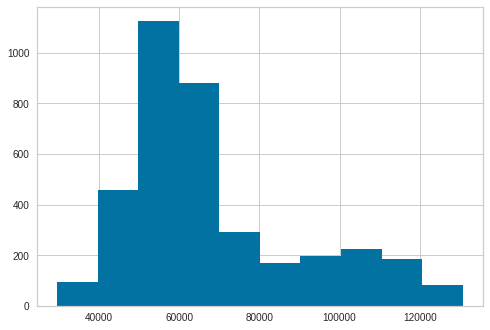

In [ ]:
plt.hist(df['Close'])

In [ ]:
df['Close'+'_Log_Return'] = np.log(df['Close']/df['Close'].shift(1)).round(3)

#df['Close'+'_Log_Return'] = ((df['Close'] / df['Close'].shift(1)) - 1).round(2)
df.dropna(inplace=True)
df.head()

,Close,Close_Log_Return
Date,,
2007-01-03,44445.0,-0.021
2007-01-04,44020.0,-0.010
2007-01-05,42245.0,-0.041
2007-01-08,42830.0,0.014
2007-01-09,42007.0,-0.019


In [ ]:
serie_retorno_log_preco = px.line(df, x=df.index, y=df['Close_Log_Return'], title='Close Log Return', template = 'plotly_white')
serie_retorno_log_preco.show()

(array([2.000e+00, 4.000e+00, 9.000e+00, 3.300e+01, 6.590e+02, 2.608e+03,
        3.600e+02, 2.200e+01, 5.000e+00, 3.000e+00]),
 array([-0.16  , -0.1303, -0.1006, -0.0709, -0.0412, -0.0115,  0.0182,
         0.0479,  0.0776,  0.1073,  0.137 ]),
 <a list of 10 Patch objects>)

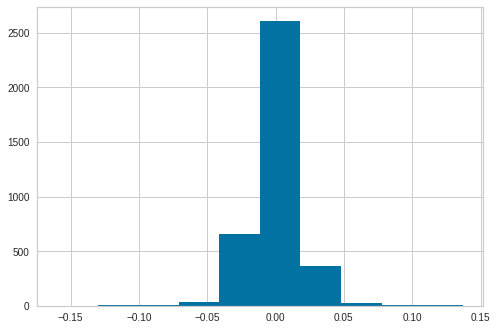

In [ ]:
plt.hist(df['Close_Log_Return'])

### Verificando a presença de outliers na série de retorno do preço

In [ ]:
aux = df[['Close_Log_Return']].describe()
valorMin = np.float64(aux.loc['min']).item()
valorMax = np.float64(aux.loc['max']).item()
q1 = np.float64(aux.loc['25%']).item()
q3 = np.float64(aux.loc['75%']).item()
intervalo = 1.5 * (q3-q1)
limite_min = max((q1 - intervalo), valorMin)
limite_max = min((q3 + intervalo), valorMax)
normais = np.where(df['Close_Log_Return'] > limite_min, df['Close_Log_Return'], np.nan)
menores = np.isnan(normais).sum()
print('Dados da feature: ', 'Close Log Return')
print(f'Quantidade de outliers inferiores: {menores}')
print(f'Percentual do dataset: {round(menores/len(normais), 6)}%')
normais = np.where(df['Close_Log_Return'] < limite_max, df['Close_Log_Return'], np.nan)
maiores = np.isnan(normais).sum()
print(f'Quantidade de outliers superiores: {maiores}')
print(f'Percentual do dataset: {round(maiores/len(normais), 6)}%')
print(f'\nQuantidade total de outliers: {menores+maiores}')
print(f'Percentual do dataset: {round((menores+maiores)/len(normais), 6)}%\n')

fig = go.Figure()
fig.add_trace(go.Box(x=df['Close_Log_Return'], name='Close Log Return'))
fig.show()

Dados da feature:  Close Log Return
Quantidade de outliers inferiores: 69
Percentual do dataset: 0.018623%
Quantidade de outliers superiores: 59
Percentual do dataset: 0.015924%

Quantidade total de outliers: 128
Percentual do dataset: 0.034548%



### Gerando série de retorno de preço suavizada por média móvel de 5 dias

In [ ]:
df_SMA5 = pd.DataFrame()

df_SMA5['log_return_close'] = df['Close_Log_Return'].rolling(window=5).mean().round(3)

df_SMA5.dropna(inplace=True)
   
aux = df_SMA5[['log_return_close']].describe()
valorMin = np.float64(aux.loc['min']).item()
valorMax = np.float64(aux.loc['max']).item()
q1 = np.float64(aux.loc['25%']).item()
q3 = np.float64(aux.loc['75%']).item()
intervalo = 1.5 * (q3-q1)
limite_min = max(q1 - intervalo, valorMin)
limite_max = min((q3 + intervalo), valorMax)
normais = np.where(df_SMA5['log_return_close'] > limite_min, df_SMA5['log_return_close'], np.nan)
menores = np.isnan(normais).sum()
print('Dados da feature: ', 'Close')
print(f'Quantidade de outliers inferiores: {menores}')
print(f'Percentual do dataset: {round(menores/len(normais), 6)}%')
normais = np.where(df_SMA5['log_return_close'] < limite_max, df_SMA5['log_return_close'], np.nan)
maiores = np.isnan(normais).sum()
print(f'Quantidade de outliers superiores: {maiores}')
print(f'Percentual do dataset: {round(maiores/len(normais), 6)}%')
print(f'\nQuantidade total de outliers: {menores+maiores}')
print(f'Percentual do dataset: {round((menores+maiores)/len(normais), 6)}%\n')

fig = go.Figure()
fig.add_trace(go.Box(x=df_SMA5['log_return_close'], name='log_return_close'))
fig.show()

Dados da feature:  Close
Quantidade de outliers inferiores: 51
Percentual do dataset: 0.01378%
Quantidade de outliers superiores: 33
Percentual do dataset: 0.008917%

Quantidade total de outliers: 84
Percentual do dataset: 0.022697%



In [ ]:
df_SMA5.rename(columns={'log_return_close': 'log_return_close_SMA5'}, inplace = True)

In [ ]:
df_SMA5

,log_return_close_SMA5
Date,
2007-01-09,-0.015
2007-01-10,-0.010
2007-01-11,-0.006
2007-01-12,0.004
2007-01-15,0.001
...,...
2021-12-23,-0.006
2021-12-27,-0.003
2021-12-28,-0.000


In [ ]:
serie_log_return_SMA5= px.line(df_SMA5, x=df_SMA5.index, y=df_SMA5['log_return_close_SMA5'], title='Close log return SMA5')
serie_log_return_SMA5.show()

(array([2.000e+00, 4.000e+00, 8.000e+00, 2.100e+01, 2.770e+02, 2.421e+03,
        9.070e+02, 5.400e+01, 6.000e+00, 1.000e+00]),
 array([-0.068, -0.056, -0.044, -0.032, -0.02 , -0.008,  0.004,  0.016,
         0.028,  0.04 ,  0.052]),
 <a list of 10 Patch objects>)

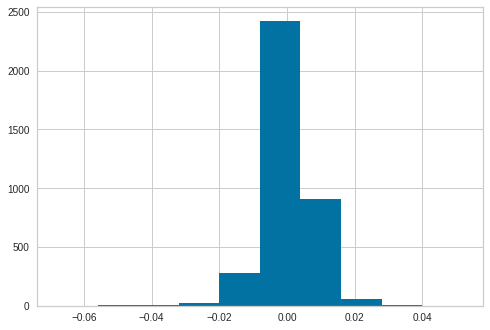

In [ ]:
plt.hist(df_SMA5['log_return_close_SMA5'])

## Janelas Móveis

In [ ]:
def window_generator(sequence, n_steps):
    x, y = list(), list()
    for i in range(len(sequence)):
        
        end_ix = i + n_steps

        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

### Janelando a série de dados brutos

In [ ]:
df_aux = list()

seq, ts = window_generator(df_SMA5['log_return_close_SMA5'].values, 2)
temp1 = pd.DataFrame(seq)
#temp1.rename(columns={0 : f'Close_Log_Return_t3', 1 : f'Close_Log_Return_t2', 2 : f'Close_Log_Return_t1'}, inplace=True)
temp1.rename(columns={0 : f'Close_Log_Return_t2', 1 : f'Close_Log_Return_t1'}, inplace=True)
temp1['Close_Log_Return'] = ts.tolist()
df_aux.append(temp1)

df_aux = pd.concat(df_aux, axis=1)
df_janelado_dados_SMA5 = df_aux.copy(deep=True)
df_janelado_dados_SMA5.head()

,Close_Log_Return_t2,Close_Log_Return_t1,Close_Log_Return
0,-0.015,-0.010,-0.006
1,-0.010,-0.006,0.004
2,-0.006,0.004,0.001
3,0.004,0.001,0.003
4,0.001,0.003,0.002


## Separando o conjunto de treino e teste

In [ ]:
df_janelado_dados_SMA5

,Close_Log_Return_t2,Close_Log_Return_t1,Close_Log_Return
0,-0.015,-0.010,-0.006
1,-0.010,-0.006,0.004
2,-0.006,0.004,0.001
3,0.004,0.001,0.003
4,0.001,0.003,0.002
...,...,...,...
3694,-0.002,-0.004,-0.006
3695,-0.004,-0.006,-0.003
3696,-0.006,-0.003,-0.000
3697,-0.003,-0.000,-0.002


## Checando número de linhas

In [ ]:
print("quantidade de linhas dados brutos :",df_janelado_dados_SMA5.shape[0])

quantidade de linhas dados brutos : 3699


## Divisão dos dados em conjunto de treino e teste

aplicando normalização

In [ ]:
obj_norm = MinMaxScaler().fit(df_janelado_dados_SMA5)
norm_df_SMA5 = obj_norm.transform(df_janelado_dados_SMA5)

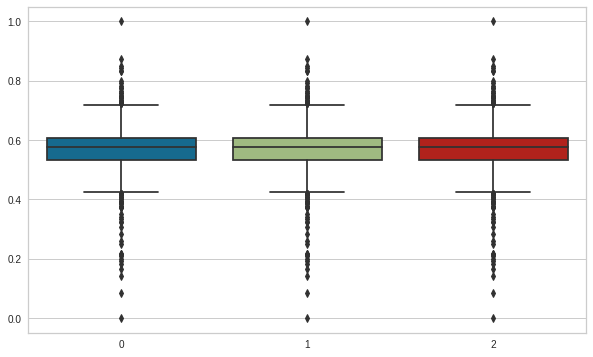

In [ ]:
#from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=norm_df_SMA5)

In [ ]:
norm_df_SMA5 = pd.DataFrame(norm_df_SMA5)

In [ ]:
norm_df_SMA5.describe()

,0,1,2
count,3699.000000,3699.000000,3699.000000
mean,0.568654,0.568683,0.568703
std,0.061982,0.061948,0.061932
min,0.000000,0.000000,0.000000
25%,0.533333,0.533333,0.533333
50%,0.575000,0.575000,0.575000
75%,0.608333,0.608333,0.608333
max,1.000000,1.000000,1.000000


In [ ]:
norm_df_SMA5.rename(columns={0:'Close_Log_Return_t2',1:'Close_Log_Return_t1',2:'Close_Log_Return'}, inplace = True)

In [ ]:
norm_df_SMA5

,Close_Log_Return_t2,Close_Log_Return_t1,Close_Log_Return
0,0.441667,0.483333,0.516667
1,0.483333,0.516667,0.600000
2,0.516667,0.600000,0.575000
3,0.600000,0.575000,0.591667
4,0.575000,0.591667,0.583333
...,...,...,...
3694,0.550000,0.533333,0.516667
3695,0.533333,0.516667,0.541667
3696,0.516667,0.541667,0.566667
3697,0.541667,0.566667,0.550000


In [ ]:
#-----------------------Dados Brutos-----------------------#

df_SMA5_train = norm_df_SMA5.loc[0:np.round(norm_df_SMA5.shape[0]*0.7),:] #70% para treino
df_SMA5_test = norm_df_SMA5.loc[np.round(norm_df_SMA5.shape[0]*0.7):,:]#30% para teste

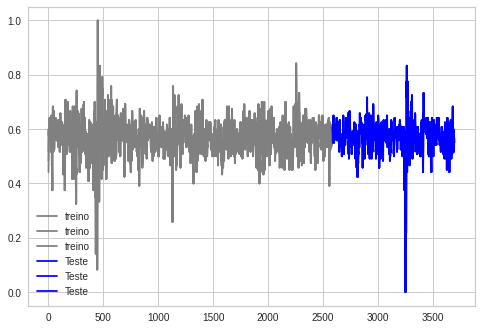

In [ ]:
'''fig, ax = plt.subplots()
ax.plot(df_SMA5_train, color='gray', label="treino")
ax2 = ax.twinx()
ax2.plot(df_SMA5_test, color='blue',label='Teste')
plt.legend()
plt.show()'''


plt.plot(df_SMA5_train, color='gray', label="treino")
plt.plot(df_SMA5_test, color='blue',label='Teste')
plt.legend()
plt.show()

In [ ]:
df_SMA5_train

,Close_Log_Return_t2,Close_Log_Return_t1,Close_Log_Return
0,0.441667,0.483333,0.516667
1,0.483333,0.516667,0.600000
2,0.516667,0.600000,0.575000
3,0.600000,0.575000,0.591667
4,0.575000,0.591667,0.583333
...,...,...,...
2585,0.591667,0.600000,0.591667
2586,0.600000,0.591667,0.616667
2587,0.591667,0.616667,0.600000
2588,0.616667,0.600000,0.608333


In [ ]:
df_SMA5_test

,Close_Log_Return_t2,Close_Log_Return_t1,Close_Log_Return
2589,0.600000,0.608333,0.600000
2590,0.608333,0.600000,0.575000
2591,0.600000,0.575000,0.550000
2592,0.575000,0.550000,0.558333
2593,0.550000,0.558333,0.583333
...,...,...,...
3694,0.550000,0.533333,0.516667
3695,0.533333,0.516667,0.541667
3696,0.516667,0.541667,0.566667
3697,0.541667,0.566667,0.550000


In [ ]:
#inspecionando as dimensões das amostras de treino e teste de cada conjunto de dados
print("----------Dados brutos---------")
print(df_SMA5_train.shape)
print(df_SMA5_test.shape)

----------Dados brutos---------
(2590, 3)
(1110, 3)


###Configurando AutoML

### Dados brutos - "x" e "y" de treino

In [ ]:
y_train_SMA5 = df_SMA5_train['Close_Log_Return']
y_train_SMA5.head()

0    0.516667
1    0.600000
2    0.575000
3    0.591667
4    0.583333
Name: Close_Log_Return, dtype: float64

In [ ]:
#x_train_cols = 
x_train_SMA5 = df_SMA5_train[['Close_Log_Return_t2','Close_Log_Return_t1']]

# Normalizando os dados de entrada(features)
#scaler = StandardScaler()
#x_train_SMA5_scale = scaler.fit_transform(x_train_SMA5)  # Normalizando os dados de entrada(treinamento)

#x_train_brutos.head()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.08333333, 0.175     , 0.26666667, 0.35833333, 0.45      ,
        0.54166667, 0.63333333, 0.725     , 0.81666667, 0.90833333,
        1.        ]),
 <a list of 2590 Lists of Patches objects>)

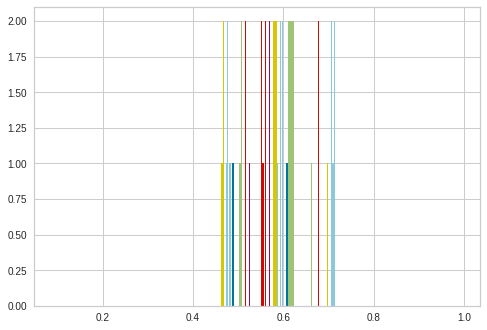

In [ ]:
#plt.hist(x_train_SMA5_scale)
plt.hist(x_train_SMA5)

(array([2.00e+00, 4.00e+00, 5.00e+00, 5.30e+01, 6.75e+02, 1.51e+03,
        3.16e+02, 2.00e+01, 4.00e+00, 1.00e+00]),
 array([0.08333333, 0.175     , 0.26666667, 0.35833333, 0.45      ,
        0.54166667, 0.63333333, 0.725     , 0.81666667, 0.90833333,
        1.        ]),
 <a list of 10 Patch objects>)

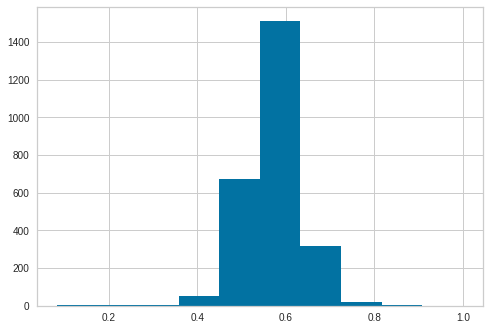

In [ ]:
plt.hist(y_train_SMA5)

### Dados brutos - "x" e "y" de teste

In [ ]:
y_test_SMA5 = df_SMA5_test['Close_Log_Return']
y_test_SMA5.head()

2589    0.600000
2590    0.575000
2591    0.550000
2592    0.558333
2593    0.583333
Name: Close_Log_Return, dtype: float64

In [ ]:
x_test_SMA5 = df_SMA5_test[['Close_Log_Return_t2','Close_Log_Return_t1']]

#x_test_SMA5_scale  = scaler.transform(x_test_SMA5) 

x_test_SMA5.head()

,Close_Log_Return_t2,Close_Log_Return_t1
2589,0.600000,0.608333
2590,0.608333,0.600000
2591,0.600000,0.575000
2592,0.575000,0.550000
2593,0.550000,0.558333


## Utilizando algoritmos de machine learning para verificação do desempenho da previsão em cada caso.

### Aplicando otimização de hiperparâmetros com RandomSearchCV

### Criando diferentes SVRs com as diferentes kernels

In [ ]:
#'kernel': ['rbf','linear','poly'],
svr_regressor = NuSVR()
#svr_regressor_linear = SVR(kernel='linear')
#svr_regressor_poly = SVR(kernel='poly')

In [ ]:
#Definindo o espaço de busca de hiperparâmetros. Para cada um é definida uma faixa de busca
hyperparameters_svr = {
     "C": list(range(1,100)),
    'kernel': ['poly'],
    #"gamma": list(range(1,100)),
    "max_iter": list(range(2,5000)),
    'nu': np.linspace(0.1,0.9),
    'gamma':['scale', 'auto'],
    'degree': list(range(2,100))
    #'epsilon': list(range(1,100))
}

In [ ]:
print(np.linspace(0.1,0.9))

[0.1        0.11632653 0.13265306 0.14897959 0.16530612 0.18163265
 0.19795918 0.21428571 0.23061224 0.24693878 0.26326531 0.27959184
 0.29591837 0.3122449  0.32857143 0.34489796 0.36122449 0.37755102
 0.39387755 0.41020408 0.42653061 0.44285714 0.45918367 0.4755102
 0.49183673 0.50816327 0.5244898  0.54081633 0.55714286 0.57346939
 0.58979592 0.60612245 0.62244898 0.63877551 0.65510204 0.67142857
 0.6877551  0.70408163 0.72040816 0.73673469 0.75306122 0.76938776
 0.78571429 0.80204082 0.81836735 0.83469388 0.85102041 0.86734694
 0.88367347 0.9       ]


### Criando um modelo para cada tipo de SVR utilizando busca aleatória de hiperparâmetros.

In [ ]:
model_svr_RS = RandomizedSearchCV(
    svr_regressor,
    hyperparameters_svr,
    n_iter = 60,
    cv = 17, 
    scoring = 'neg_mean_squared_error'
)

#esclarecer o 'cv'.

In [ ]:
model_svr_RS

RandomizedSearchCV(cv=17, estimator=NuSVR(), n_iter=60,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...],
                                        'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23, 24,
                                                   25, 26, 27, 28, 29, 30, 31, ...],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly'],
                                        'max_iter': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                     11, 12, 13, 14, 15...
       0.42653061, 0.44285714, 0.4591

## Treinando o modelo com as três kernels - Dados Brutos

#### Treinar o modelo utilizando as melhores combinações aleatórias de hiperparâmetros encontradas - Utilizando Kernel RBF

In [ ]:
#treinar o modelo utilizando as combinações aleatórias a fim de obter a melhor combinação de hiperparâmetros 
#with warnings.catch_warnings():
model_svr_RS.fit(x_train_SMA5, y_train_SMA5)

In [ ]:
model_svr_RS.best_params_

{'nu': 0.7204081632653062,
 'max_iter': 4835,
 'kernel': 'poly',
 'gamma': 'auto',
 'degree': 4,
 'C': 34}

In [ ]:
best_svr_linear = model_svr_RS.best_estimator_
print(best_svr_linear)

NuSVR(C=34, degree=4, gamma='auto', kernel='poly', max_iter=4835,
      nu=0.7204081632653062)


### Previsão e métricas - Dados brutos

In [ ]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

#### Utilizando kernel RBF

In [ ]:
#desnormalizar: scaler.inverse_transform
pred_SMA5_linear = best_svr_linear.predict(x_test_SMA5)
#print("Score do regressor SVR  :", _best_svr_rbf_model.score( x_test_brutos_scale , y_test_brutos ))
print("Score do r2  :",r2_score(y_test_SMA5 , pred_SMA5_linear))
print("Erro quadrático médio (valores próximos a zero são melhores) :", mean_squared_error(y_test_SMA5 , pred_SMA5_linear))

print("smape:", smape(y_test_SMA5, pred_SMA5_linear), "%")

Score do r2  : 0.4894388323607417
Erro quadrático médio (valores próximos a zero são melhores) : 0.0017697977284657116
smape: 5.007873938636572 %


##### Visualizando a previsão em comparação com dados reais de teste - SVR utilizando kernel RBF

In [ ]:
df_previsao_versus_real_dados_SMA5_linear = pd.DataFrame({'previsto': pred_SMA5_linear,
                   'real_dados_brutos': y_test_SMA5})

df_previsao_versus_real_dados_SMA5_linear

,previsto,real_dados_brutos
2589,0.594029,0.600000
2590,0.585753,0.575000
2591,0.565237,0.550000
2592,0.548730,0.558333
2593,0.556450,0.583333
...,...,...
3694,0.539563,0.516667
3695,0.530576,0.541667
3696,0.546662,0.566667
3697,0.562868,0.550000


In [ ]:
previsao_dados_SMA5_linear = px.line(df_previsao_versus_real_dados_SMA5_linear, x=df_previsao_versus_real_dados_SMA5_linear.index, y=df_previsao_versus_real_dados_SMA5_linear.columns, title='Previsto X real - Dados SMA5 - Modelo de SVR com kernel linear')
previsao_dados_SMA5_linear.show()